# Breast Cancer Detection Using CNN

**IDC classification using keras**

In [1]:
from glob import glob
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

In [3]:
files = glob('/kaggle/input/breast-histopathology-images/*/*/*')

In [4]:
count =0 
for file in files:
    if file[-5] == '1':
        count+=1
print(count)

78838


In [5]:
len(files)

278082

In [6]:
def show_img(files):
    plt.figure(figsize= (10,10))
    ind = np.random.randint(0, len(files), 25)
    i=0
    for loc in ind:
        plt.subplot(5,5,i+1)
        sample = load_img(files[loc], target_size=(150,150))
        sample = img_to_array(sample)
        plt.axis("off")
        plt.imshow(sample.astype("uint8"))
        i+=1

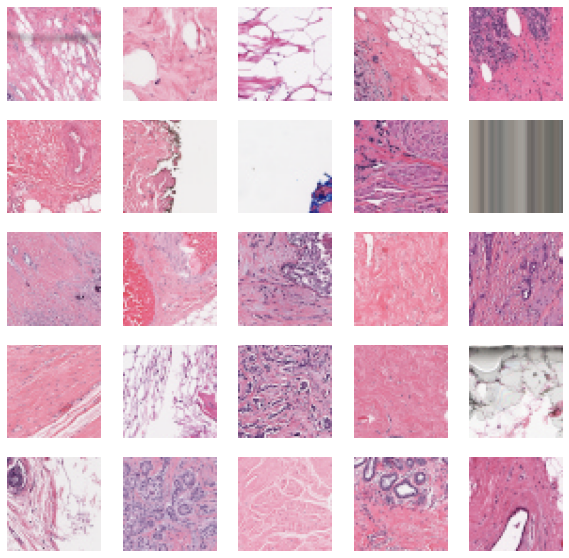

In [7]:
show_img(files)

In [8]:
def load_data(files, lower_limit, upper_limit):
    X = []
    y = []
    for file in files[lower_limit:upper_limit]:
        if file.endswith(".png"):
            img = load_img(file, target_size = (50,50))
            pixels = img_to_array(img)
            pixels /= 255
            X.append(pixels)
            if(file[-5] == '1'):
                y.append(1)
            elif(file[-5] == '0'):
                y.append(0)
    return np.stack(X), y
        
    

In [9]:
from sklearn.model_selection import train_test_split
#Splitting the data into training set
X_train,y_train = load_data(files,0, 90000)

In [10]:
import seaborn as sns

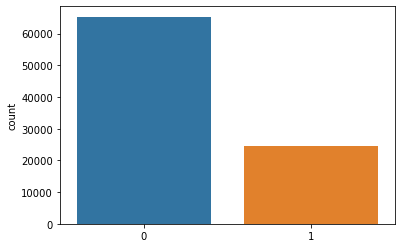

In [11]:
sns.countplot(y_train)

In [12]:
X_test, y_test = load_data(files, 90000, 110000)

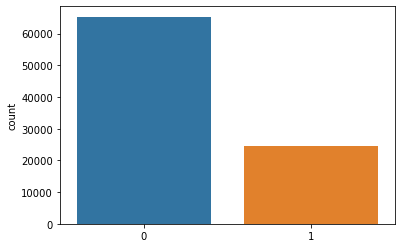

In [13]:
sns.countplot(y_test)

## Handling Class Imbalance Problem 

In [14]:
files[:5]

['/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x1351_y1101_class0.png',
 '/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x1501_y501_class0.png',
 '/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x1501_y1101_class0.png',
 '/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x451_y901_class0.png',
 '/kaggle/input/breast-histopathology-images/10295/0/10295_idx5_x801_y451_class0.png']

In [15]:
def load_balanced_data(files, size, start_index):
    half_size = int(size/2)
    count=0
    res = []
    y = []
    for file in files[start_index:]:
        if (count!=half_size):
            if file[-5] == '1' and file.endswith(".png"):
                img = load_img(file, target_size = (50,50))
                pixels = img_to_array(img)
                pixels /= 255
                res.append(pixels)
                y.append(1)
                count += 1
                
    for file in files[start_index:]:
        if(count!=0):
            if(file[-5] == '0'):
                img = load_img(file, target_size = (50,50))
                pixels = img_to_array(img)
                pixels /= 255
                res.append(pixels)
                y.append(0)
                count -= 1
    return np.stack(res), y
    
            

In [16]:
X_train2, y_train2 = load_balanced_data(files, 90000,0)

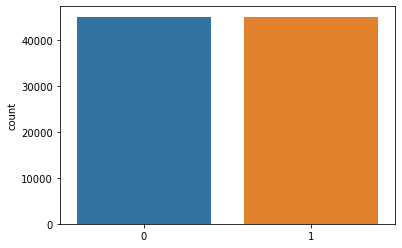

In [17]:
sns.countplot(y_train2)

In [18]:
x_test2, y_test2 = load_balanced_data(files, 20000, 100000)

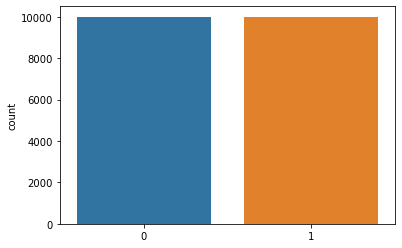

In [19]:
sns.countplot(y_test2)

In [20]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Conv2D, Activation, MaxPooling2D, Flatten, BatchNormalization

In [21]:
#Creation And Architecture of Concolutional Neural Network
def def_model(inp_shape = (50,50,3)):
    inp = Input(inp_shape)
    m = Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(inp)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = BatchNormalization()(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Flatten()(m)
    m = Dense(128, activation = "relu")(m)
    out = Dense(1, activation = "sigmoid")(m)
    model = Model(inp, out)
    model.compile(optimizer = keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])
    return model

In [22]:
model = def_model()

In [23]:
#describe the CNN Model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        256 

In [24]:
#Training The CNN Model with 25 Epochs
history = model.fit(X_train2, y_train2, validation_data=(x_test2, y_test2), epochs = 15, batch_size=256)

Train on 90000 samples, validate on 20000 samples
Epoch 1/15
90000/90000 [==============================] - 278s 3ms/step - loss: 0.4469 - acc: 0.8011 - val_loss: 0.3971 - val_acc: 0.8328
Epoch 2/15
90000/90000 [==============================] - 274s 3ms/step - loss: 0.3920 - acc: 0.8283 - val_loss: 0.4141 - val_acc: 0.8181
Epoch 3/15
90000/90000 [==============================] - 275s 3ms/step - loss: 0.3722 - acc: 0.8375 - val_loss: 0.3811 - val_acc: 0.8362
Epoch 4/15
90000/90000 [==============================] - 272s 3ms/step - loss: 0.3570 - acc: 0.8448 - val_loss: 0.3998 - val_acc: 0.8228
Epoch 5/15
90000/90000 [==============================] - 272s 3ms/step - loss: 0.3438 - acc: 0.8517 - val_loss: 0.3378 - val_acc: 0.8609
Epoch 6/15
90000/90000 [==============================] - 276s 3ms/step - loss: 0.3339 - acc: 0.8554 - val_loss: 0.3116 - val_acc: 0.8698
Epoch 7/15
90000/90000 [==============================] - 272s 3ms/step - loss: 0.3245 - acc: 0.8590 - val_loss: 0.3217 - 

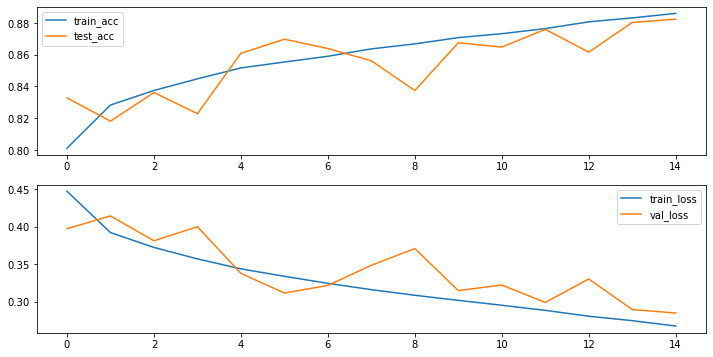

In [25]:
#plot the accuracy graph
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history.history['acc'], label="train_acc")
plt.plot(history.history['val_acc'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

**Trying Dropout and Data Augmentation**

In [26]:
def def_model2(inp_shape = (50,50,3)):
    inp = Input(inp_shape)
    m = Conv2D(32, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(inp)
    m = MaxPooling2D(2)(m)
    m = Conv2D(64, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(128, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)
    m = Conv2D(256, (3,3), kernel_initializer='he_uniform', padding="same", activation='relu')(m)
    m = MaxPooling2D(2)(m)

    m = Dropout(0.2)(m)
    m = Flatten()(m)

    m = Dense(128, activation = "relu")(m)
    out = Dense(1, activation = "sigmoid")(m)
    model = Model(inp, out)
    model.compile(optimizer = keras.optimizers.SGD(1e-3, momentum=0.9), loss="binary_crossentropy", metrics = ['acc'])
    return model

In [27]:
model2 = def_model2()

In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
#Using ImageDataGenerator To Generate similar images
datagen = ImageDataGenerator(height_shift_range=0.2,
                            width_shift_range=0.2,
                            zoom_range=0.2,
                            shear_range=0.2)

In [30]:
train_generator = datagen.flow(X_train2, y_train2, batch_size=256)
val_generator = datagen.flow(x_test2, y_test2, batch_size=256)

In [31]:
#Training The Model using train_generator and val_generator
history2 = model2.fit(train_generator, validation_data=val_generator, epochs = 15)

Epoch 1/15
352/352 [==============================] - 321s 912ms/step - loss: 0.5996 - acc: 0.6876 - val_loss: 0.5362 - val_acc: 0.8135
Epoch 2/15
352/352 [==============================] - 317s 900ms/step - loss: 0.5102 - acc: 0.7650 - val_loss: 0.3541 - val_acc: 0.8250
Epoch 3/15
352/352 [==============================] - 319s 907ms/step - loss: 0.4853 - acc: 0.7792 - val_loss: 0.4167 - val_acc: 0.8314
Epoch 4/15
352/352 [==============================] - 320s 910ms/step - loss: 0.4688 - acc: 0.7867 - val_loss: 0.3516 - val_acc: 0.8384
Epoch 5/15
352/352 [==============================] - 317s 901ms/step - loss: 0.4636 - acc: 0.7906 - val_loss: 0.4030 - val_acc: 0.8391
Epoch 6/15
352/352 [==============================] - 318s 903ms/step - loss: 0.4526 - acc: 0.7963 - val_loss: 0.2811 - val_acc: 0.8282
Epoch 7/15
352/352 [==============================] - 318s 904ms/step - loss: 0.4432 - acc: 0.8002 - val_loss: 0.2091 - val_acc: 0.8380
Epoch 8/15
352/352 [============================

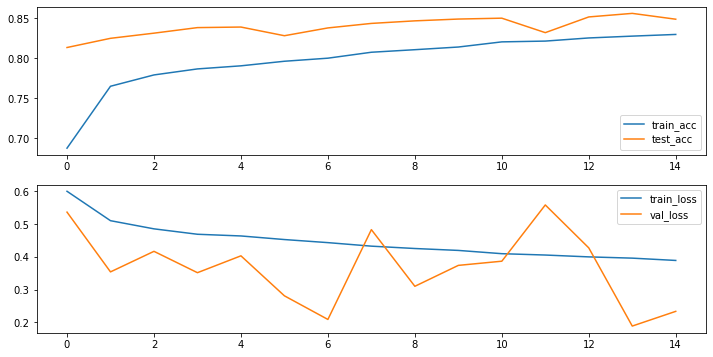

In [32]:
#plot accuracy and loss graph
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history2.history['acc'], label="train_acc")
plt.plot(history2.history['val_acc'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history2.history['loss'], label = "train_loss")
plt.plot(history2.history['val_loss'], label = "val_loss")
plt.legend()

In [33]:
#Testing The CNN Model
pred = model.predict(x_test2)

In [34]:
#Classification To check wether IDC or Not IDC
res = []
for prediction in pred:
    if(prediction > 0.5):
        res.append(1)
    else:
        res.append(0)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
#Final Classification Report using Confusion Matrix
print(confusion_matrix(y_test2, res))
print(classification_report(y_test2, res))

[[8497 1503]
 [ 849 9151]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     10000
           1       0.86      0.92      0.89     10000

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



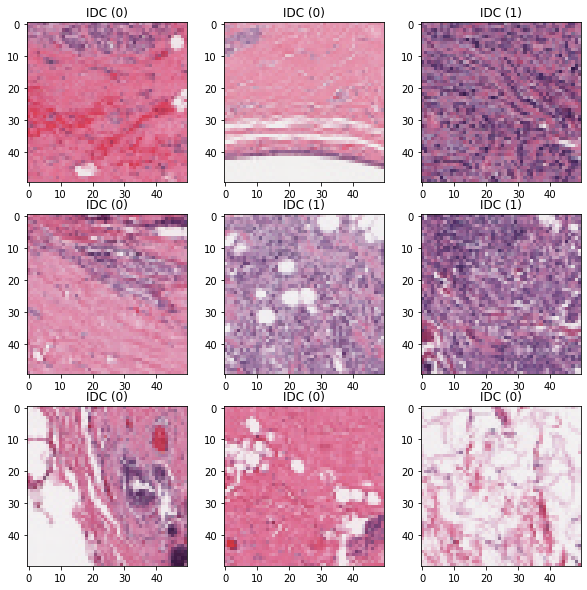

In [36]:

plt.figure(figsize= (10,10))
ind = np.random.randint(0, len(pred), 9)
i=0
#The patient having IDC is represented by IDC 1 ,IDC 0 otherwise.
for loc in ind:
    plt.subplot(3,3,i+1)
    plt.xlabel(None)
    plt.title("IDC ({})".format(res[loc]))
        
    plt.imshow(x_test2[loc])
    i+=1